In [1]:
#importação das bibliotecas
import cv2
import numpy as np
from matplotlib import pyplot as plt

## Subreposição com limiar adaptativo

In [2]:
def mostrar(imagem):
    fig = plt.gcf()
    fig.set_size_inches(18,6)
    plt.imshow(imagem, cmap='gray')
    plt.axis('off')
    plt.show()

In [3]:
def limiarizacao_adaptativa(img, limiar = 148, block_size = 11, C = 9):
    _, limiar_global = cv2.threshold(img, limiar, 255, cv2.THRESH_BINARY)
    limiar_media = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, block_size, C)
    limiar_gauss = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, block_size, C)
    
    imagens = [img, limiar_global, limiar_media, limiar_gauss]
    titulos = ['Imagem original','Limiarização global','Limiarização adaptativa = média','Limiarização adaptativa = gaussiana']

    fig = plt.gcf()
    fig.set_size_inches(18,12)
    
    for i in range(4):
        plt.subplot(2,2,i+1)
        plt.imshow(cv2.cvtColor(imagens[i], cv2.COLOR_BGR2RGB), cmap='gray')
        plt.title(titulos[i])
        plt.xticks([]),plt.yticks([])        

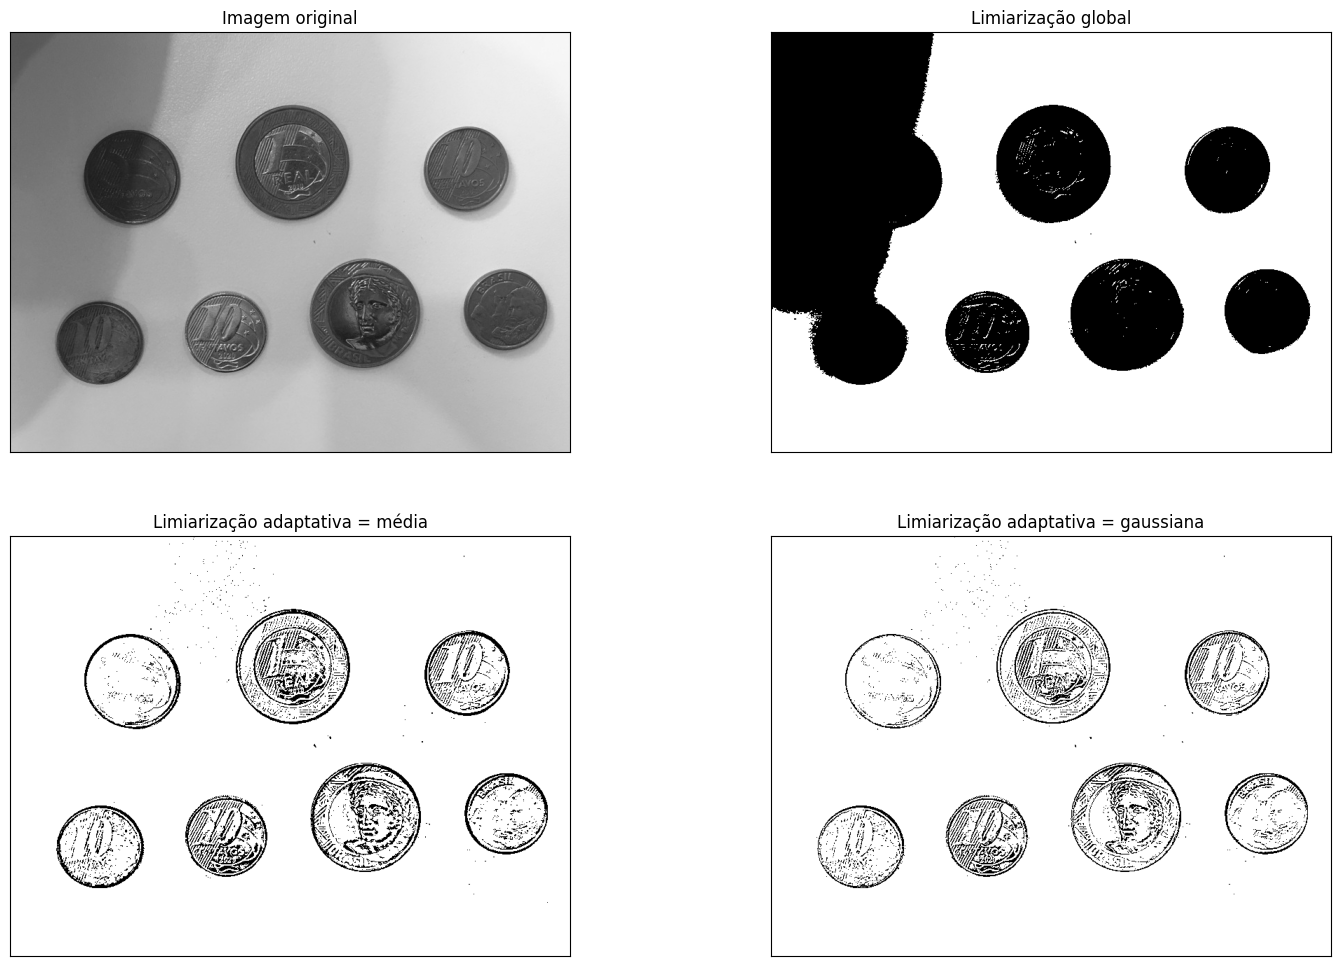

In [4]:
img = cv2.imread('imagens/moedas02.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
limiarizacao_adaptativa(gray)

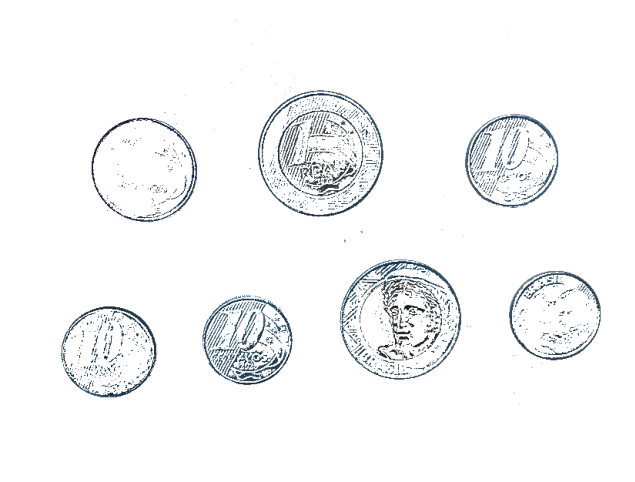

In [6]:
adapt_gauss = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 15, 11)
sobrepor = cv2.add(img, cv2.cvtColor(adapt_gauss, cv2.COLOR_GRAY2BGR))
mostrar(sobrepor)

# Segmentação baseada em bordas

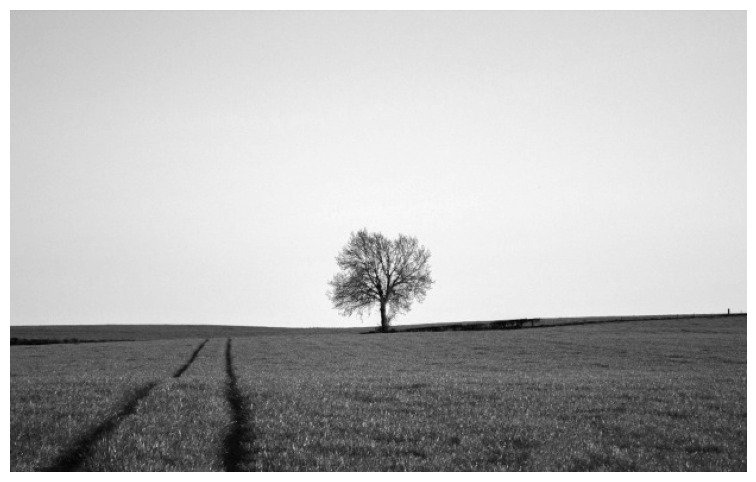

In [7]:
img = cv2.imread('imagens/paisagem01.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
mostrar(gray)

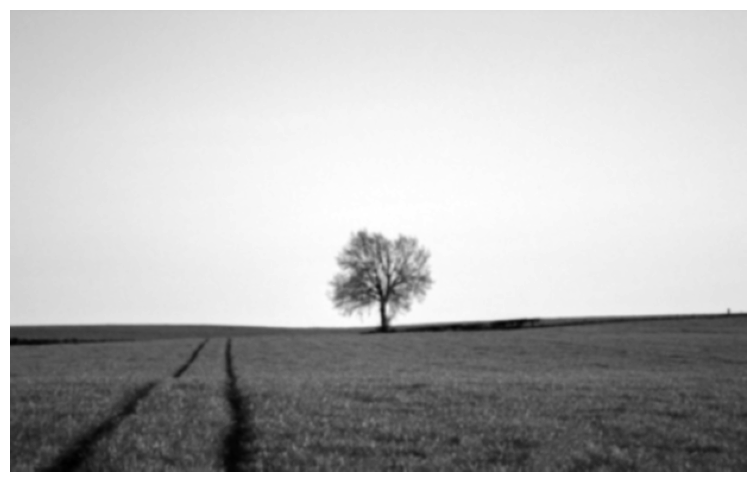

In [8]:
desfoque = cv2.GaussianBlur(gray, (5,5), 0)
mostrar(desfoque)

# Sobel

In [9]:
#Primeiro maneira
k_sobelX = np.array(([-1, 0, 1],
                     [-2, 0, 2],
                     [-1, 0, 1]), np.float32)
k_sobelY = np.array(([-1, -2, -1],
                     [0, 0, 0],
                     [1, 2, 1]), np.float32)

sobel_x = cv2.filter2D(desfoque, cv2.CV_64F, k_sobelX)
sobel_y = cv2.filter2D(desfoque, cv2.CV_64F, k_sobelY)

In [10]:
# Segunda maneira
# k size tamanho do 0
sobel_x = cv2.Sobel(desfoque, cv2.CV_64F, 1, 0, ksize = 3)
sobel_y = cv2.Sobel(desfoque, cv2.CV_64F, 0, 1, ksize = 3)

In [11]:
#Converter e escala de numeros inteiro 
#Escala entre 0 e 255
sobel_x = cv2.convertScaleAbs(sobel_x)
sobel_y = cv2.convertScaleAbs(sobel_y)

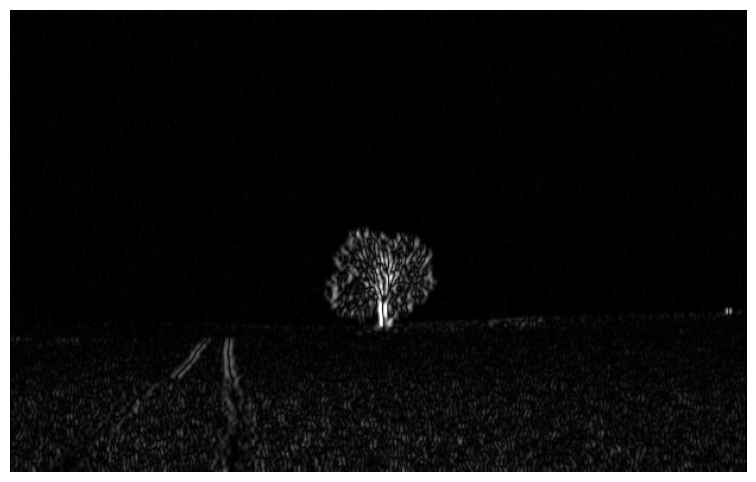

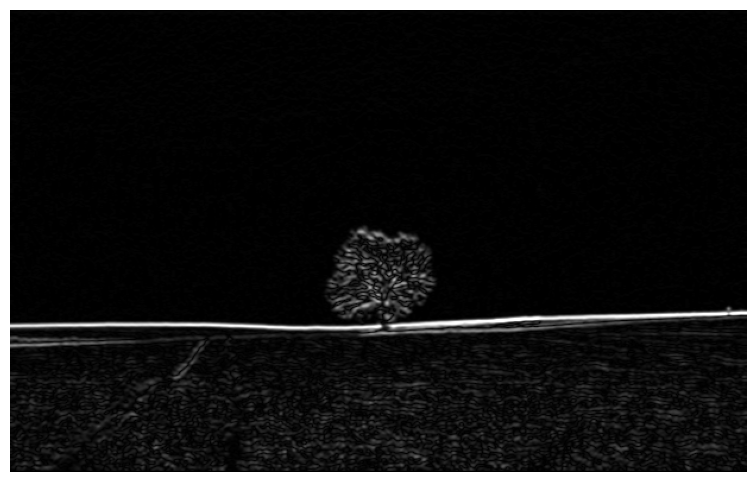

In [12]:
mostrar(sobel_x)
mostrar(sobel_y)

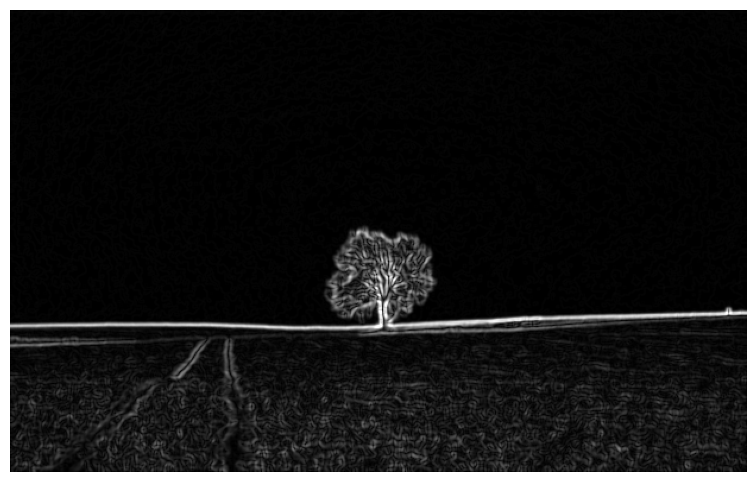

In [13]:
#Concatena as duas imagens anteriores
#O alpha e o beta são os pesos na imagem final
#O gamma é o brilho da imagem 
sobel = cv2.addWeighted(src1 = sobel_x, alpha=0.5, src2 = sobel_y, beta = 0.5, gamma = 100)
mostrar(sobel)

In [14]:
def segmentacao_bordas(img):
    desfoque = cv2.GaussianBlur(img,(5,5),0)

    sobel_x = cv2.Sobel(desfoque, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(desfoque, cv2.CV_64F, 0, 1, ksize=3)
    sobel_x = cv2.convertScaleAbs(sobel_x)
    sobel_y = cv2.convertScaleAbs(sobel_y)
    sobel = cv2.addWeighted(src1=sobel_x, alpha=0.5, src2=sobel_y, beta=0.5, gamma=0)

    canny = cv2.Canny(desfoque, 80, 140)

    kernel = np.ones((3, 3), np.uint8)
    dilatacao = cv2.dilate(canny, kernel, iterations=2)
    erosao = cv2.erode(dilatacao, kernel, iterations=1)

    imagens = [img, sobel, canny, erosao]
    titulos = ['Imagem original','Sobel','Canny Edge','Dilatação']

    fig = plt.gcf()
    fig.set_size_inches(18,12)
    
    for i in range(4):
        plt.subplot(2,2,i+1)
        plt.imshow(cv2.cvtColor(imagens[i], cv2.COLOR_BGR2RGB), cmap='gray')
        plt.title(titulos[i])
        plt.xticks([]),plt.yticks([]) 
        plt.subplots_adjust(wspace=0.1)

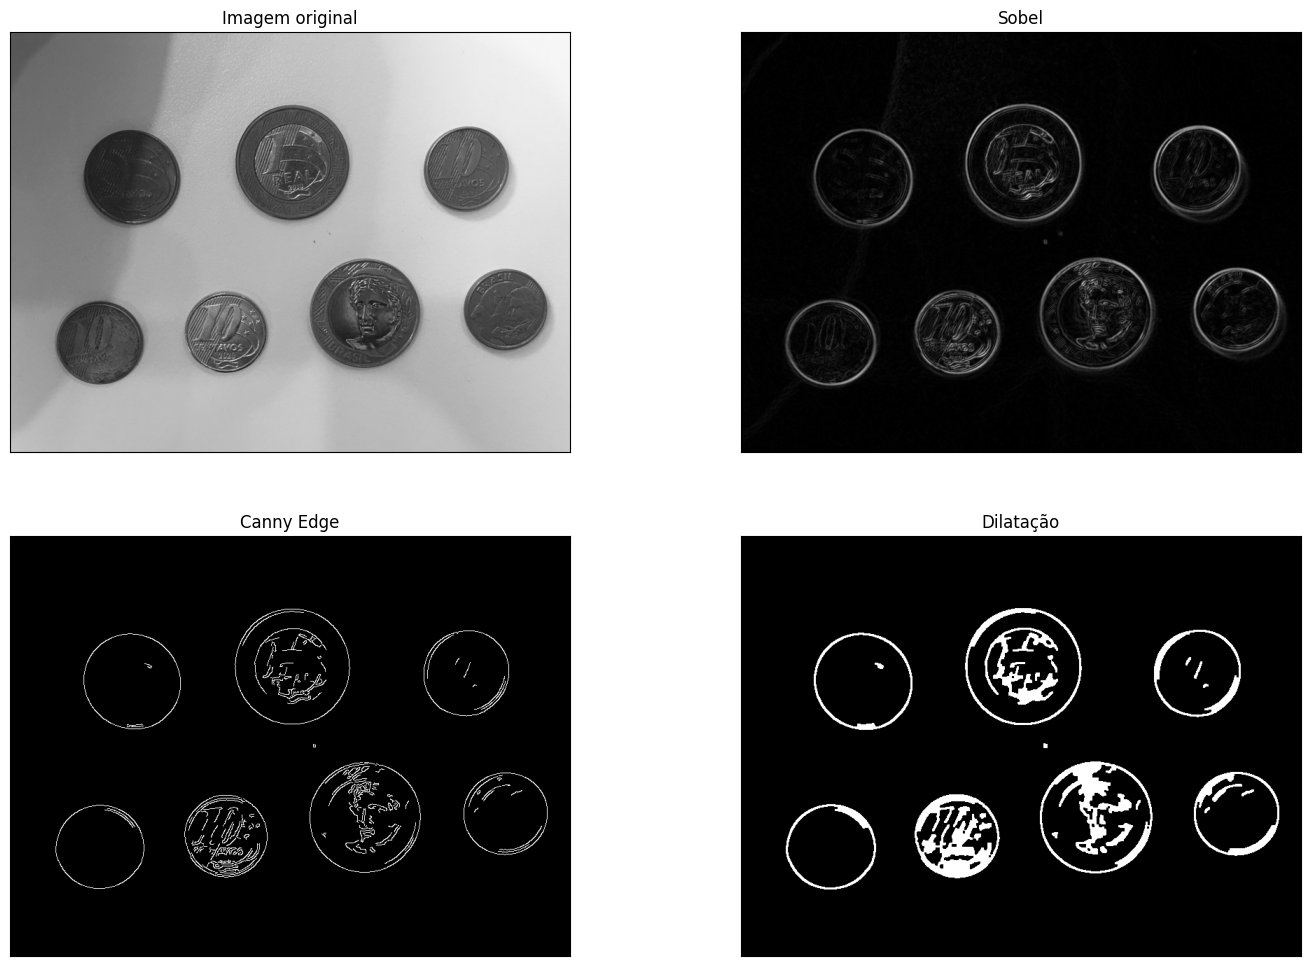

In [15]:
img = cv2.imread("imagens/moedas02.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
segmentacao_bordas(gray)

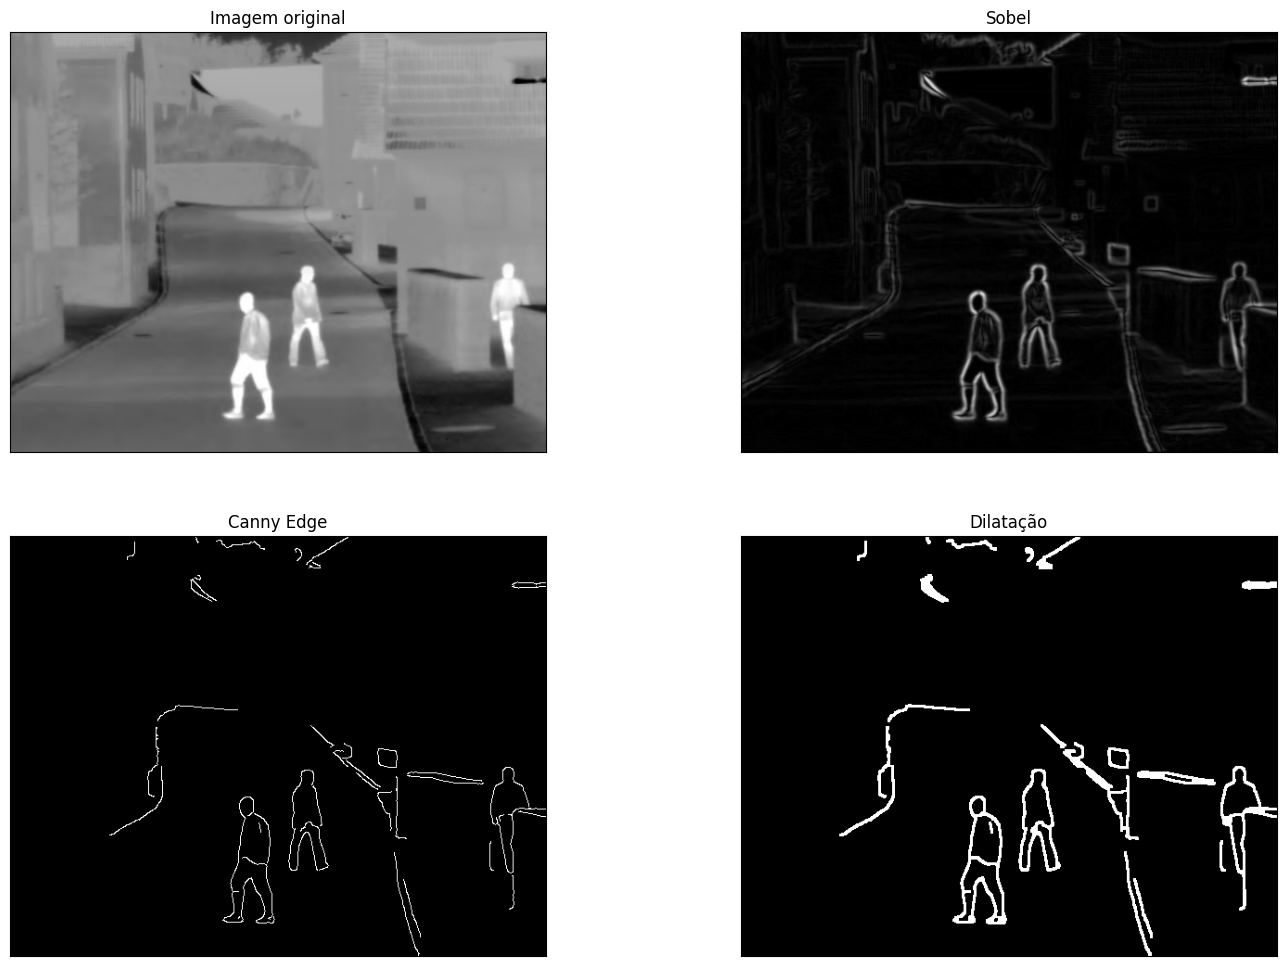

In [16]:
img = cv2.imread("imagens/thermal01.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
segmentacao_bordas(gray)

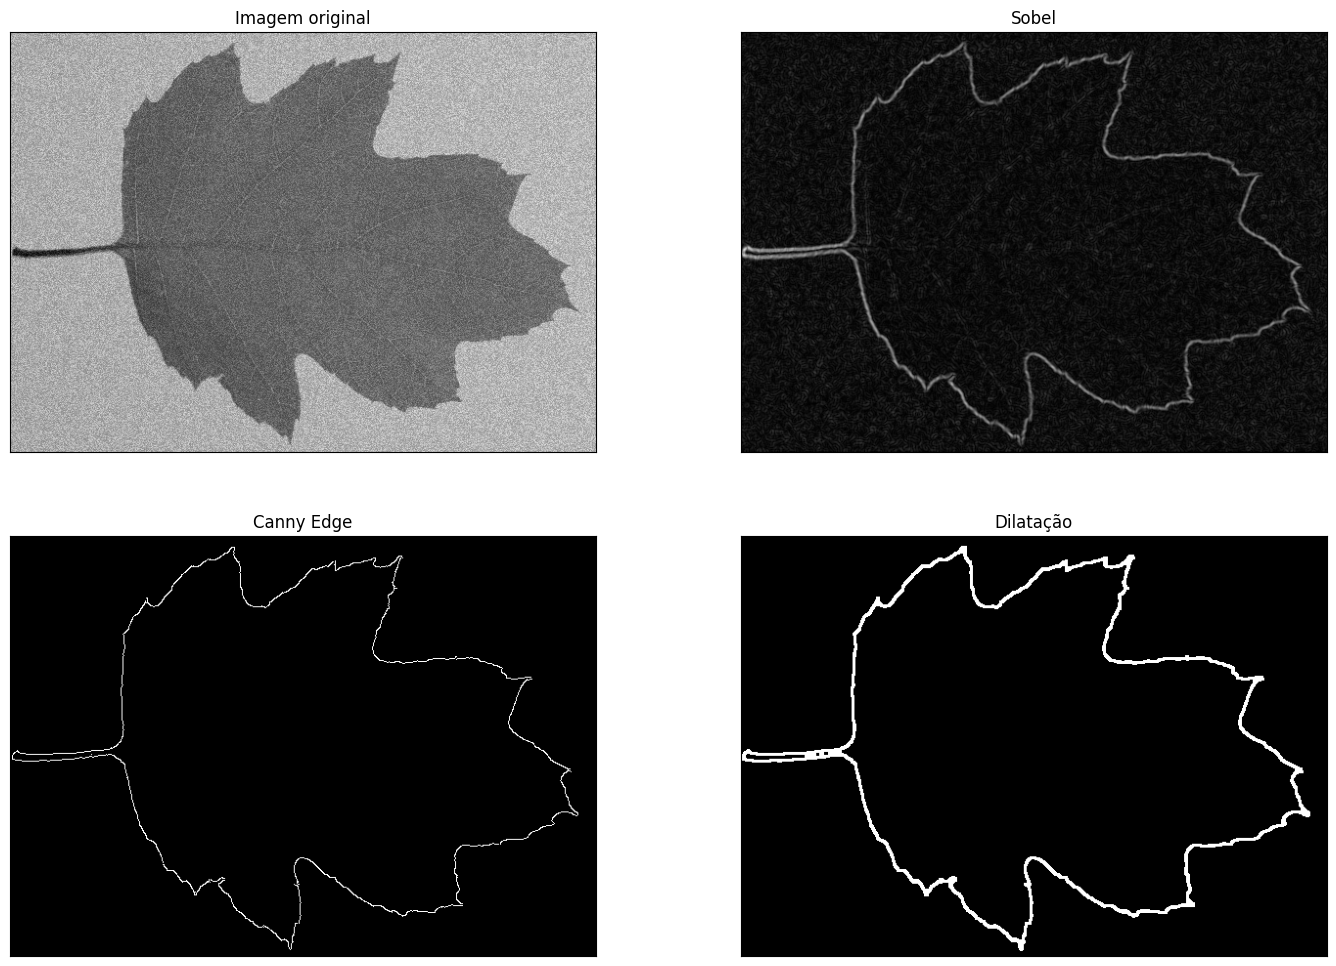

In [17]:
img = cv2.imread("imagens/folha_ruido.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
segmentacao_bordas(gray)